In [2]:
import sys

sys.path.append("../")

import behav_viz.ingest as ingest
import behav_viz.visualize as viz

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from behav_viz.utils import plot_utils as pu
from behav_viz.visualize.df_preperation import *
sns.set_context("talk")


%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# R044, R054 not in cpoke yet
ANIMALS = [
    "R040",
    "R041",
    "R042",
    "R043",
    "R045",
    "R046",
    "R047",
    "R048",
    "R049",
    "R050",
    "R051",
    "R052",
    "R053",
    "R055",
    "R056",
    "R057",
]

date_min = "2024-07-20"
date_max = "2024-08-09"

tdf = ingest.create_trials_df.create_trials_df_from_dj(ANIMALS, date_min, date_max)

animal_id R040
Fetched 20 dates from Sessions table from 2024-07-20 to 2024-08-08 for R040

animal_id R041
Fetched 20 dates from Sessions table from 2024-07-20 to 2024-08-08 for R041

animal_id R042
Fetched 20 dates from Sessions table from 2024-07-20 to 2024-08-08 for R042

animal_id R043
Fetched 21 dates from Sessions table from 2024-07-20 to 2024-08-08 for R043

animal_id R045
Fetched 19 dates from Sessions table from 2024-07-20 to 2024-08-08 for R045

animal_id R046
Fetched 20 dates from Sessions table from 2024-07-20 to 2024-08-08 for R046

animal_id R047
Fetched 19 dates from Sessions table from 2024-07-20 to 2024-08-08 for R047

animal_id R048
Fetched 13 dates from Sessions table from 2024-07-27 to 2024-08-08 for R048

animal_id R049
Fetched 10 dates from Sessions table from 2024-07-29 to 2024-08-07 for R049

animal_id R050
Fetched 13 dates from Sessions table from 2024-07-27 to 2024-08-08 for R050

animal_id R051
Fetched 13 dates from Sessions table from 2024-07-27 to 2024-08-0

In [6]:
df = viz.df_preperation.compute_days_relative_to_stage(
    tdf.query("stage >= 5 and stage <=7").copy(), stage=5
)

# Plot Cpoke dur failed & sucesss by condition, relative to stage 5

In [36]:
combined_cpoke_durs_long

,animal_id,date,trial,cpoke_dur,was_valid,fixation_dur
0,R040,2024-08-01,1,0.0256,True,0.010000
1,R040,2024-08-01,2,0.0304,True,0.011000
2,R040,2024-08-01,3,0.0242,True,0.012000
3,R040,2024-08-01,4,0.0259,True,0.013000
4,R040,2024-08-01,5,0.0241,True,0.014000
...,...,...,...,...,...,...
20178,R046,2024-08-08,368,0.3258,False,1.132378
20179,R046,2024-08-08,370,1.0543,False,1.133510
20180,R046,2024-08-08,373,1.0155,False,1.135778
20181,R046,2024-08-08,378,1.0554,False,1.140328


In [37]:
sub_df[["animal_id", "date", "days_relative_to_stage_5"]]

,animal_id,date,days_relative_to_stage_5
0,R040,2024-08-01,0
1,R040,2024-08-01,0
2,R040,2024-08-01,0
3,R040,2024-08-01,0
4,R040,2024-08-01,0
...,...,...,...
34619,R056,2024-08-08,4
34620,R056,2024-08-08,4
34621,R056,2024-08-08,4
34622,R056,2024-08-08,4


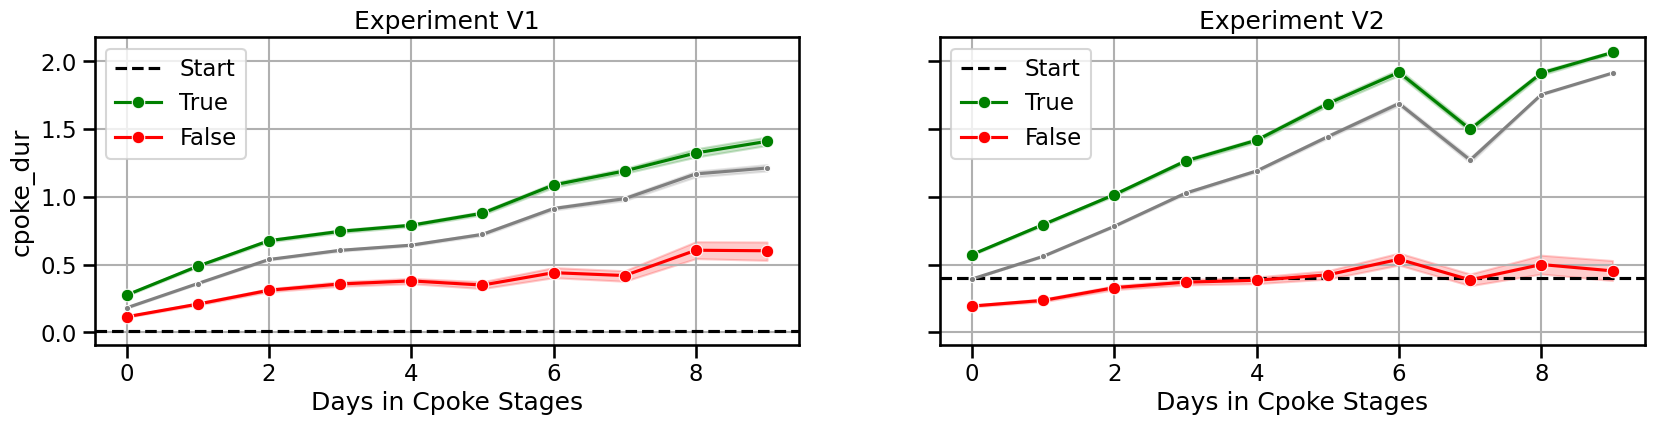

In [56]:
cpoke_stats = []
for ii, (exp, sub_df) in enumerate(df.groupby("fix_experiment")):
    grouped_results = sub_df.groupby(["days_relative_to_stage_5"])[df.columns].apply(
        lambda group: viz.FixationGrower.df_preperation.compute_cpoke_stats(
            group, False
        )
    )

    combined_cpoke_durs_long = grouped_results.reset_index()
    combined_cpoke_durs_long["fix_experiment"] = [exp] * len(combined_cpoke_durs_long)
    cpoke_stats.append(combined_cpoke_durs_long)

    ax[ii].axhline(
        sub_df.initial_fixation_dur.mean(), color="black", linestyle="--", label="Start"
    )

    sns.lineplot(
        data=combined_cpoke_durs_long,
        x="days_relative_to_stage_5",
        y="cpoke_dur",
        hue="was_valid",
        marker="o",
        hue_order=[True, False],
        palette=["green", "red"],
        ax=ax[ii],
    )

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="fixation_dur",
        color="gray",
        marker=".",
        ax=ax[ii],
    )

    ax[ii].set(title=f"Experiment {exp}", xlabel="Days in Cpoke Stages")

for iax in ax:
    pass
    iax.grid()

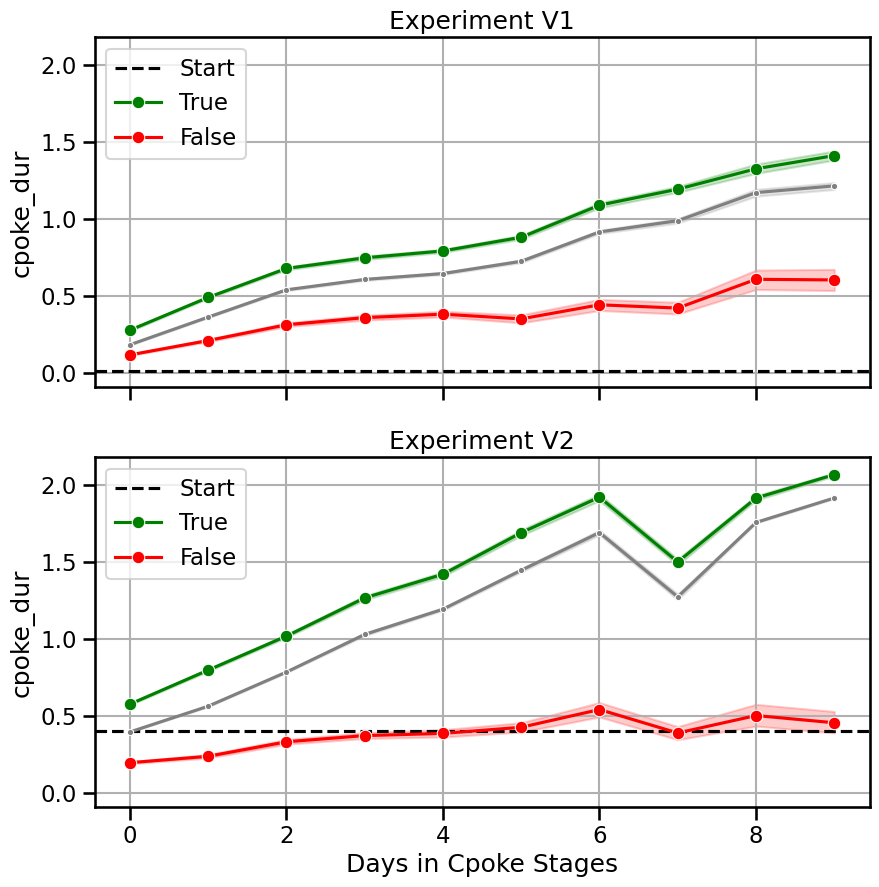

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharey=True, sharex=True)

for ii, (exp, sub_df) in enumerate(df.groupby("fix_experiment")):
    grouped_results = sub_df.groupby(["days_relative_to_stage_5"])[df.columns].apply(
        lambda group: viz.FixationGrower.df_preperation.compute_cpoke_stats(
            group, False
        )
    )

    combined_cpoke_durs_long = grouped_results.reset_index()

    ax[ii].axhline(
        sub_df.initial_fixation_dur.mean(), color="black", linestyle="--", label="Start"
    )

    sns.lineplot(
        data=combined_cpoke_durs_long,
        x="days_relative_to_stage_5",
        y="cpoke_dur",
        hue="was_valid",
        marker="o",
        hue_order=[True, False],
        palette=["green", "red"],
        ax=ax[ii],
    )

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="fixation_dur",
        color="gray",
        marker=".",
        ax=ax[ii],
    )

    ax[ii].set(title=f"Experiment {exp}", xlabel="Days in Cpoke Stages")

for iax in ax:
    pass
    iax.grid()

In [61]:
cpoke_stats_df = pd.concat(cpoke_stats)
cpoke_stats_df.head()

,days_relative_to_stage_5,level_1,animal_id,date,trial,cpoke_dur,was_valid,fixation_dur,fix_experiment
0,0,0,R040,2024-08-01,1,0.0256,True,0.010,V1
1,0,1,R040,2024-08-01,2,0.0304,True,0.011,V1
2,0,2,R040,2024-08-01,3,0.0242,True,0.012,V1
3,0,3,R040,2024-08-01,4,0.0259,True,0.013,V1
4,0,4,R040,2024-08-01,5,0.0241,True,0.014,V1


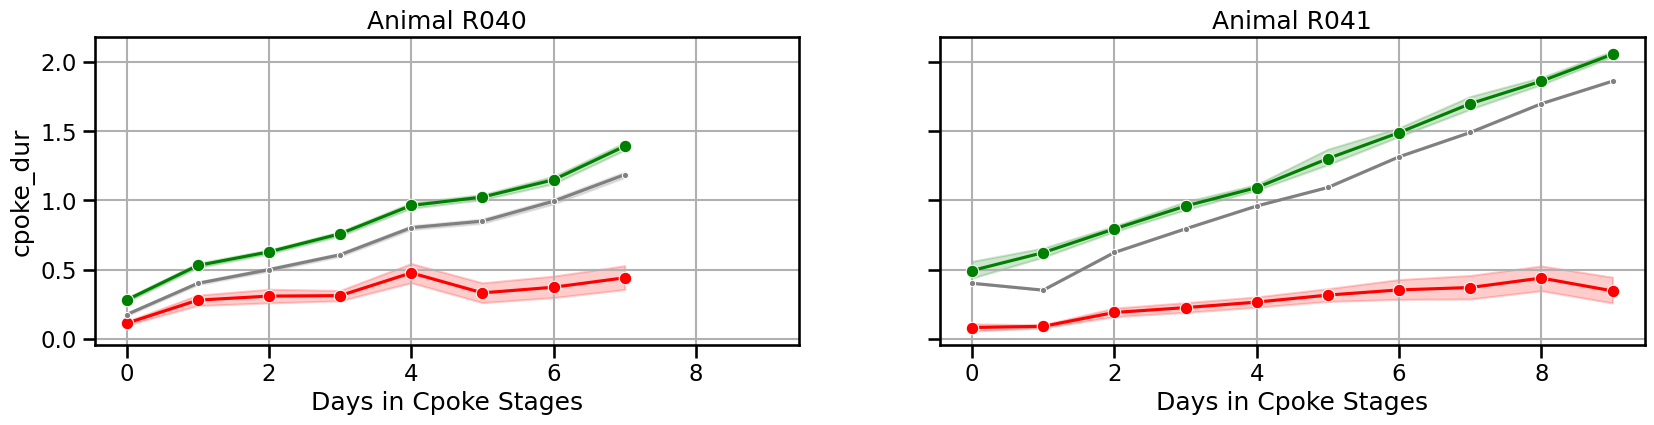

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4), sharey=True, sharex=True)

for ii, (exp, sub_df) in enumerate(
    cpoke_stats_df.query("animal_id == 'R040' or animal_id =='R041'").groupby(
        "fix_experiment"
    )
):

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="cpoke_dur",
        hue="was_valid",
        marker="o",
        style="animal_id",
        hue_order=[True, False],
        palette=["green", "red"],
        ax=ax[ii],
    )

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="fixation_dur",
        color="gray",
        marker=".",
        ax=ax[ii],
    )
ax[0].set(title=f"Animal R040", xlabel="Days in Cpoke Stages")
ax[1].set(title=f"Animal R041", xlabel="Days in Cpoke Stages")

for iax in ax:
    iax.legend().remove()
    iax.grid()

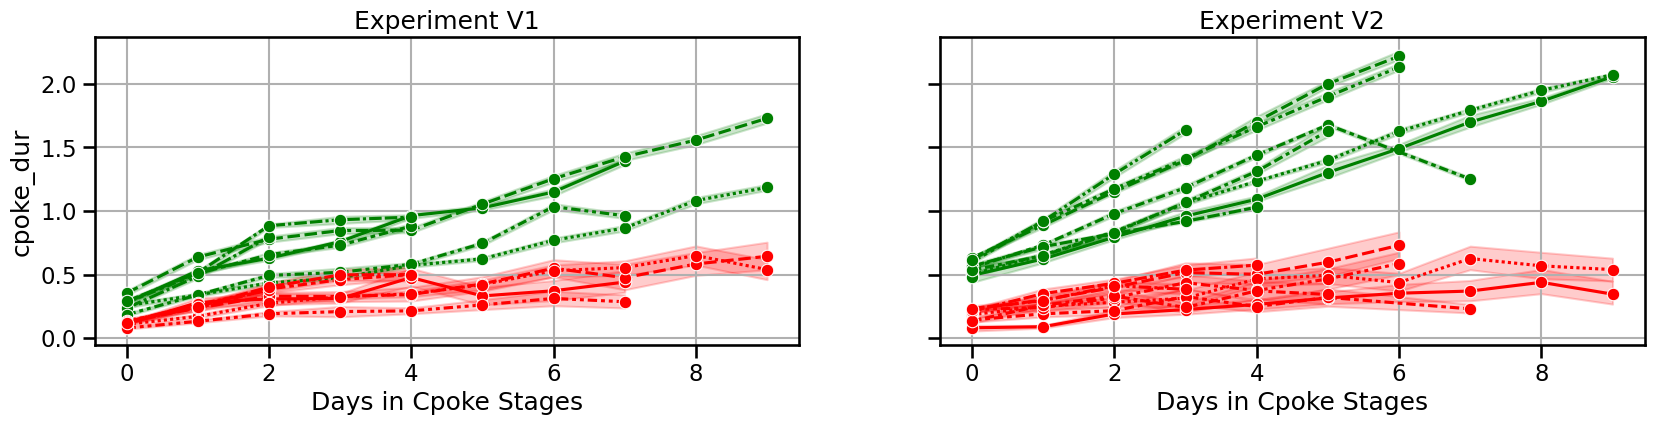

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4), sharey=True, sharex=True)

for ii, (exp, sub_df) in enumerate(cpoke_stats_df.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="cpoke_dur",
        hue="was_valid",
        marker="o",
        style="animal_id",
        hue_order=[True, False],
        palette=["green", "red"],
        ax=ax[ii],
    )
    ax[ii].set(title=f"Experiment {exp}", xlabel="Days in Cpoke Stages")

for iax in ax:
    iax.legend().remove()
    iax.grid()

# Plot Delta cpoke growth by session, by condition (boxplot and line plot)

In [103]:
df = tdf.query("stage >= 5 and stage <=7").copy()

In [104]:
fixation_delta = []

for exp, sub_df in df.groupby("fix_experiment"):
    max_fix_df = viz.FixationGrower.df_preperation.make_fixation_delta_df(sub_df)
    max_fix_df["fix_experiment"] = [exp] * len(max_fix_df)

    fixation_delta.append(max_fix_df)

fixation_delta_df = pd.concat(fixation_delta, ignore_index=True)

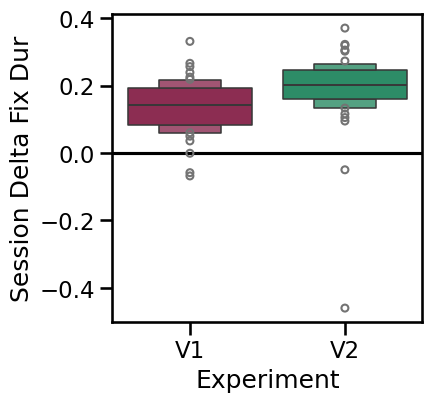

In [114]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.boxenplot(
    data=fixation_delta_df,
    x="fix_experiment",
    y="fixation_delta",
    hue="fix_experiment",
    ax=ax,
    palette=pu.ALPHA_PALLETTE,
)

ax.axhline(0, color="black", zorder=0)

_ = ax.set(
    ylabel="Session Delta Fix Dur",
    xlabel="Experiment",
)

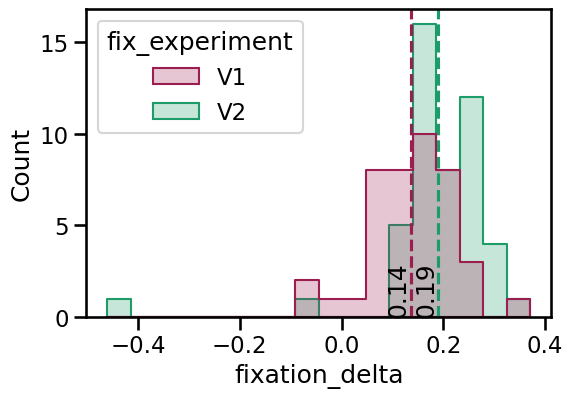

In [112]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=fixation_delta_df,
    x="fixation_delta",
    hue="fix_experiment",
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    element="step",
)

# mark the mean for each experiment
for ii, (exp, sub_df) in enumerate(fixation_delta_df.groupby("fix_experiment")):
    mean = sub_df.fixation_delta.mean()
    ax.axvline(mean, color=pu.ALPHA_PALLETTE[ii], linestyle="--")
    ax.text(
        mean,
        0,
        f"{mean:.2f}",
        rotation=90,
        verticalalignment="bottom",
        horizontalalignment="right",
    )

# Plot Failure rates by session by condition (line plot)

In [173]:
df = viz.df_preperation.compute_days_relative_to_stage(
    tdf.query("stage >= 5 and stage <=7").copy(), stage=5
)

In [174]:
failed_fix_df = viz.FixationGrower.df_preperation.compute_failed_fixation_rate_df(df)

failed_fix_df = pd.merge(
    failed_fix_df,
    df[["animal_id", "date", "days_relative_to_stage_5", "fix_experiment"]],
    how="left",
    on=["animal_id", "date"],
)

In [122]:
failed_fix_df.head()

,animal_id,date,type,failure_rate,days_relative_to_stage_5,fix_experiment
0,R040,2024-08-01,violation,0.261364,0,V1
1,R040,2024-08-01,violation,0.261364,0,V1
2,R040,2024-08-01,violation,0.261364,0,V1
3,R040,2024-08-01,violation,0.261364,0,V1
4,R040,2024-08-01,violation,0.261364,0,V1


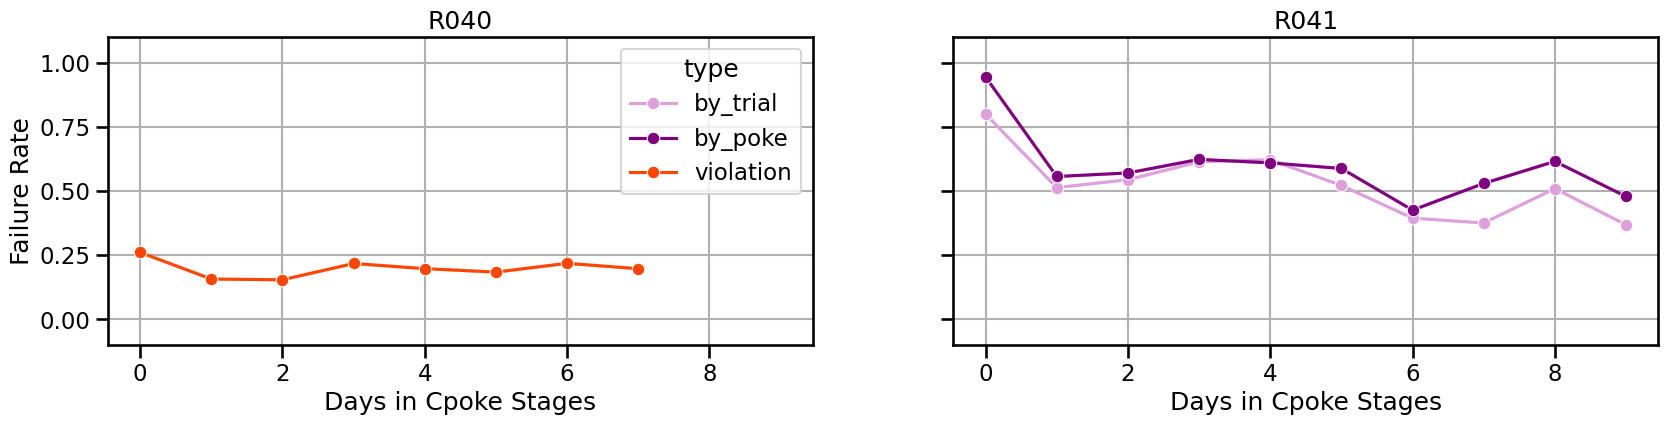

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4), sharey=True, sharex=True)

for ii, (exp, sub_df) in enumerate(
    failed_fix_df.query("animal_id == 'R040' or animal_id =='R041'").groupby(
        "fix_experiment"
    )
):

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="failure_rate",
        marker="o",
        hue="type",
        hue_order=["by_trial", "by_poke", "violation"],
        palette=["plum", "purple", "orangered"],
        ax=ax[ii],
    )

    ax[ii].set(
        title=f"Experiment {exp}",
        xlabel="Days in Cpoke Stages",
        ylabel="Failure Rate",
        ylim=(-0.1, 1.1),
    )

    ax[ii].grid()

ax[0].set_title("R040")
ax[1].set_title("R041")
ax[1].legend().remove()

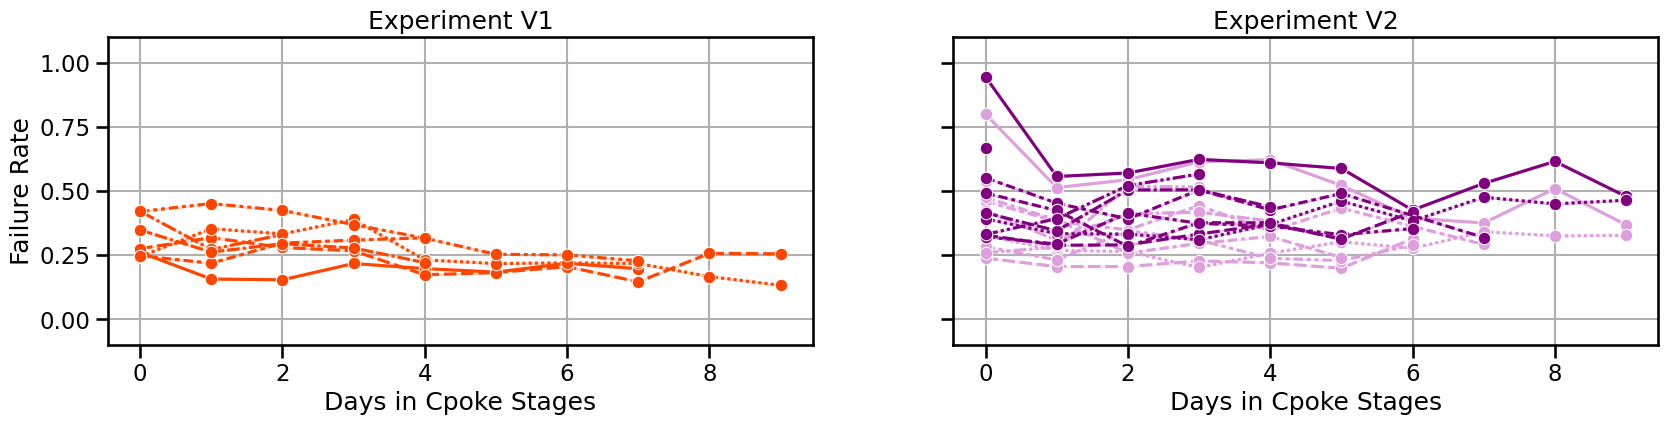

In [153]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4), sharey=True, sharex=True)

for ii, (exp, sub_df) in enumerate(failed_fix_df.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="failure_rate",
        marker="o",
        hue="type",
        hue_order=["by_trial", "by_poke", "violation"],
        palette=["plum", "purple", "orangered"],
        ax=ax[ii],
        style="animal_id",
    )

    ax[ii].set(
        title=f"Experiment {exp}",
        xlabel="Days in Cpoke Stages",
        ylabel="Failure Rate",
        ylim=(-0.1, 1.1),
    )

    ax[ii].grid()

    ax[ii].legend().remove()

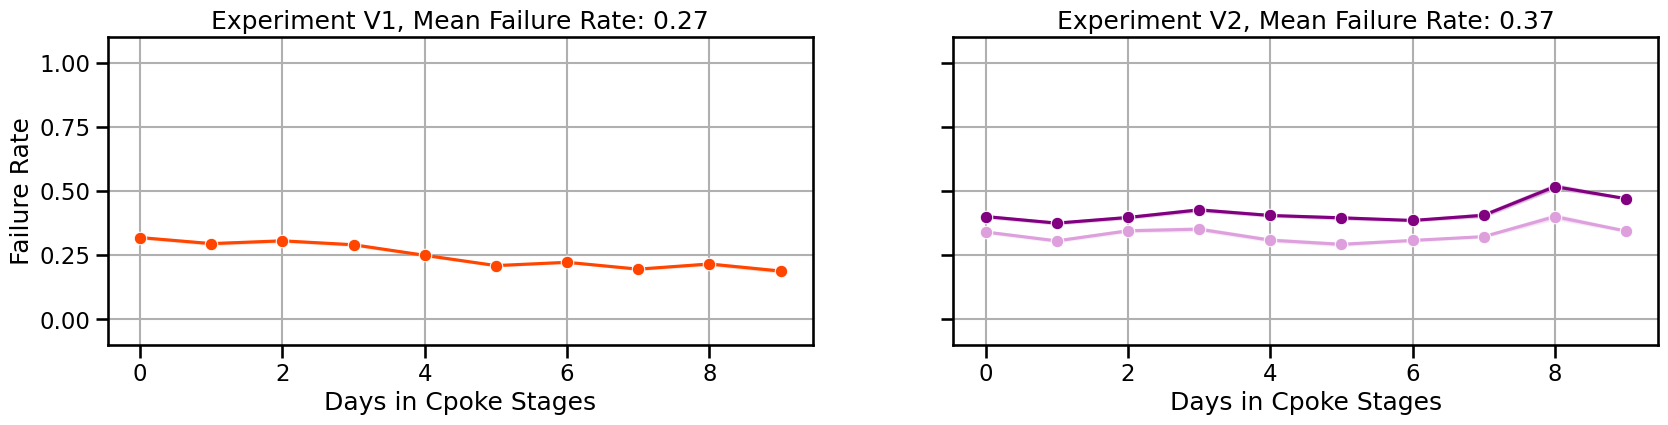

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4), sharey=True, sharex=True)

for ii, (exp, sub_df) in enumerate(failed_fix_df.groupby("fix_experiment")):

    sns.lineplot(
        data=sub_df,
        x="days_relative_to_stage_5",
        y="failure_rate",
        marker="o",
        hue="type",
        hue_order=["by_trial", "by_poke", "violation"],
        palette=["plum", "purple", "orangered"],
        ax=ax[ii],
    )

    mean = sub_df.failure_rate.mean()
    ax[ii].set(
        title=f"Experiment {exp}, Mean Failure Rate: {mean:.2f}",
        xlabel="Days in Cpoke Stages",
        ylabel="Failure Rate",
        ylim=(-0.1, 1.1),
    )

    mean = sub_df.failure_rate.mean()

    ax[ii].grid()

    ax[ii].legend().remove()

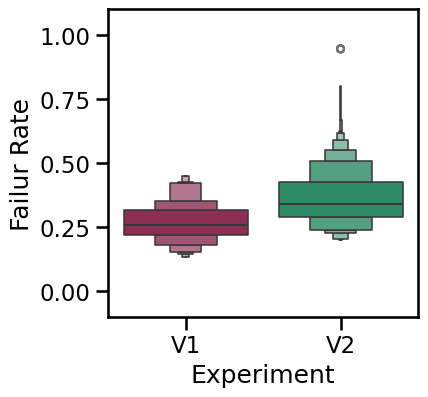

In [177]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.boxenplot(
    data=failed_fix_df,
    x="fix_experiment",
    y="failure_rate",
    hue="fix_experiment",
    ax=ax,
    palette=pu.ALPHA_PALLETTE,
)

# ax.axhline(0, color="black", zorder=0)

_ = ax.set(ylabel="Failur Rate", xlabel="Experiment", ylim=(-0.1, 1.1))

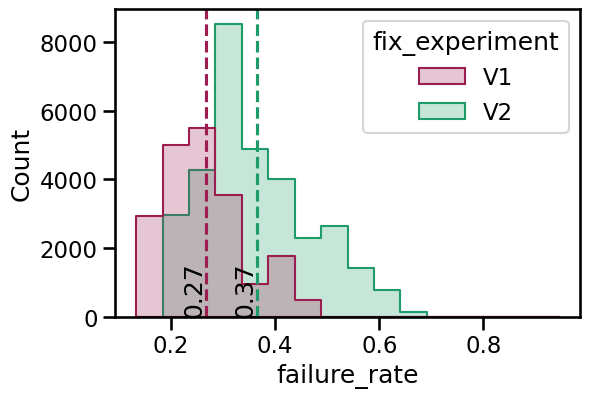

In [180]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(
    data=failed_fix_df,
    x="failure_rate",
    hue="fix_experiment",
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    element="step",
    binwidth=0.05,
)

# mark the mean for each experiment
for ii, (exp, sub_df) in enumerate(failed_fix_df.groupby("fix_experiment")):
    mean = sub_df.failure_rate.mean()
    ax.axvline(mean, color=pu.ALPHA_PALLETTE[ii], linestyle="--")
    ax.text(
        mean,
        0,
        f"{mean:.2f}",
        rotation=90,
        verticalalignment="bottom",
        horizontalalignment="right",
    )

# Plot of R043 in Stage 8 failure rate shift with delay times below

In [160]:
df = tdf.query("animal_id == 'R043' and stage >=7").copy()
df = viz.df_preperation.compute_days_relative_to_stage(df, stage=8)

failed_fix_df = viz.FixationGrower.df_preperation.compute_failed_fixation_rate_df(df)

failed_fix_df = pd.merge(
    failed_fix_df,
    df[["animal_id", "date", "days_relative_to_stage_8", "fix_experiment"]],
    how="left",
    on=["animal_id", "date"],
)

failed_fix_df.head()

,animal_id,date,type,failure_rate,days_relative_to_stage_8,fix_experiment
0,R043,2024-08-01,by_trial,0.20603,-5,V2
1,R043,2024-08-01,by_trial,0.20603,-5,V2
2,R043,2024-08-01,by_trial,0.20603,-5,V2
3,R043,2024-08-01,by_trial,0.20603,-5,V2
4,R043,2024-08-01,by_trial,0.20603,-5,V2


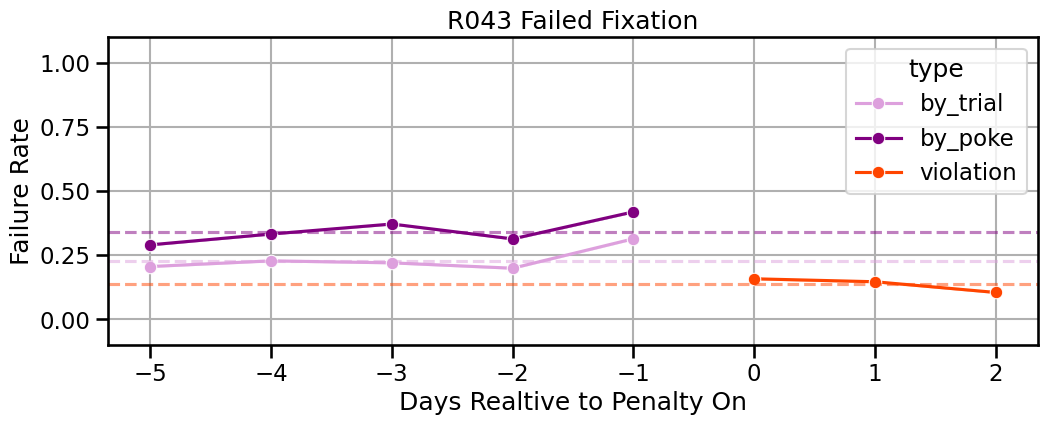

In [171]:
fig, ax = pu.make_fig()
colors = ["plum", "purple", "orangered"]
sns.lineplot(
    data=failed_fix_df,
    x="days_relative_to_stage_8",
    y="failure_rate",
    marker="o",
    hue="type",
    hue_order=["by_trial", "by_poke", "violation"],
    palette=colors,
    ax=ax,
)

ax.grid()

_ = ax.set(
    title="R043 Failed Fixation",
    xlabel="Days Realtive to Penalty On",
    ylabel="Failure Rate",
    ylim=(-0.1, 1.1),
)

for type, sub_df in failed_fix_df.groupby("type"):
    if type == "by_poke":
        color = "purple"
    elif type == "by_trial":
        color = "plum"
    else:
        color = "orangered"
    ax.axhline(sub_df.failure_rate.mean(), color=color, linestyle="--", alpha=0.5)